In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Here am making changes to access files without downloading directly from github using raw
url = "https://raw.githubusercontent.com/Rizwans-github/Netflix-Data-Cleaning-Analysis-and-Visualization/Graphs-V2/netflix1.csv"
data = pd.read_csv(url)

In [22]:
data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [23]:
data.size

87900

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [25]:
data.isnull().value_counts()

show_id  type   title  director  country  date_added  release_year  rating  duration  listed_in
False    False  False  False     False    False       False         False   False     False        8790
Name: count, dtype: int64

In [26]:
data= data.drop_duplicates()

As you can see most of the dataset is already clean so we don't have to clean the given dataset.
Let's Analyse and Visualize the given dataset.

In [27]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [28]:
# here am checking the correct year for highes releases
data['release_year'].value_counts().idxmax()

2018

In [29]:
'''Here I have updated the formula as earlier it was showing difficult to understand 
values and affecting the quality of the years extracted which earlier showes as '''
data['release_year'] = pd.to_datetime(data['release_year'], format='%Y').dt.year

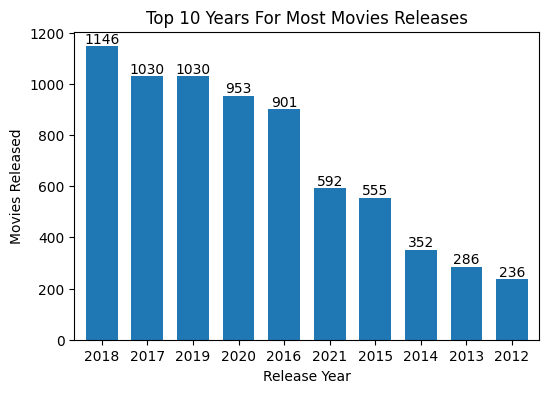

In [36]:
#Making changes to make the graph more readable
year = data.release_year.value_counts()
plt.figure(figsize=(6,4))
ax = year[:10].plot(kind = 'bar', width=0.7)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Top 10 Years For Most Movies Releases")
plt.xlabel("Release Year")
plt.ylabel("Movies Released")
plt.xticks(rotation="horizontal")
plt.show()

I have updated and found the different answer and the correct answer for the actual year the highest movies released was in 2018 with 1146 titles.


<Axes: xlabel='country'>

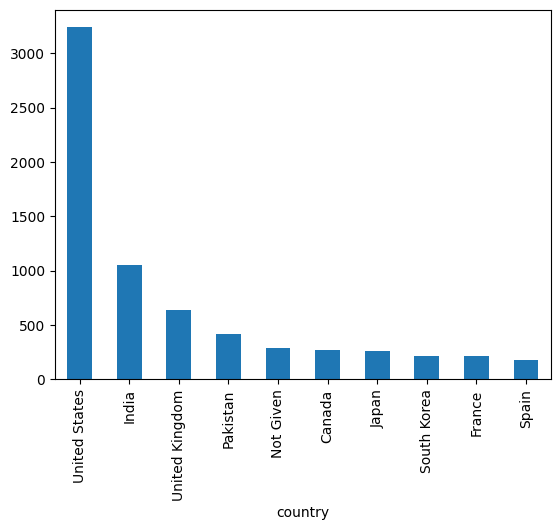

In [31]:
top_10_country = data.country.value_counts()
top_10_country[:10].plot(kind = 'bar')

<Axes: ylabel='count'>

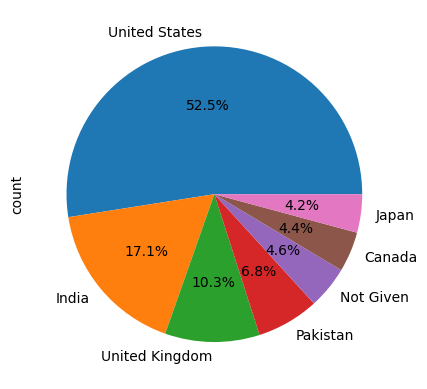

In [32]:
data_country = data.country.value_counts()
data_country[:7].plot(kind = 'pie',autopct ='%1.1f%%')

Most of the movies and TV shows are been filmed in United States and the rest are the top 10 countries.

In [33]:
data.rating.value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

Most ratings are given to the TV shows in the Dataset

<Axes: xlabel='listed_in'>

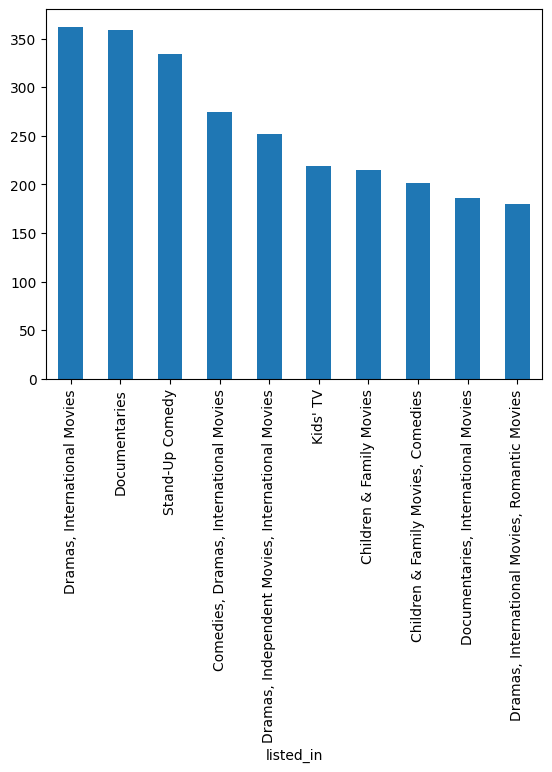

In [34]:
top_10_types = data.listed_in.value_counts()
top_10_types[:10].plot(kind = 'bar')

<Axes: ylabel='count'>

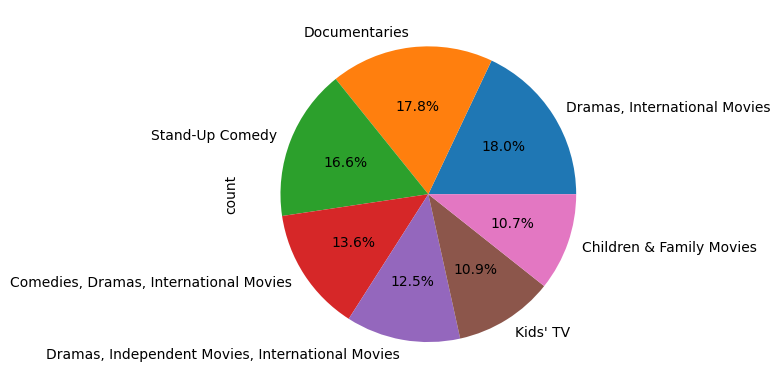

In [35]:
data_list= data.listed_in.value_counts()
data_list[:7].plot(kind = 'pie',autopct ='%1.1f%%')

These are the top 10 listed categories and top is the Dramas and international movies.